## netCDF形式の気象衛星ひまわりデータを描画する①

使用するデータ：ひまわり8号netCDF形式ファイル  
[NICTサイエンスクラウド](https://sc-web.nict.go.jp/himawari/himawari-archive.html)より入手  
・2020年7月26日00UTCのデータ(Band03)

**ライブラリインポート**

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

**データ読み込み**

In [7]:
nc = Dataset('data/NC_H08_20200726_0000_B03_JP01_R05.nc', 'r')

data = nc.variables['albedo'][:]    #反射率プロダクト
lon =  nc.variables['longitude'][:]
lat =  nc.variables['latitude'][:]

nc.close()
albedo = data[:,:]

**シェープファイルの読み込み**

In [8]:
shp = 'data/kanto/kanto.shp'
shp_list = list(shpreader.Reader(shp).geometries())

#デフォルトでは海岸線の解像度が粗いため、shpファイルを使うと良い。

**変数定義＆描画**

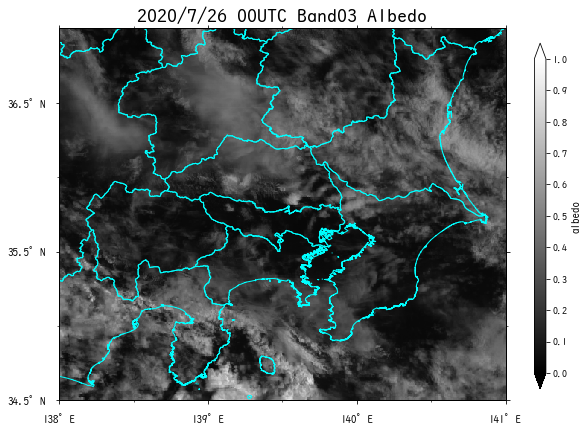

In [11]:
wlon, elon, slat, nlat = 138, 141, 34.5, 37
proj = ccrs.PlateCarree()

latfor = LatitudeFormatter()     #軸ラベルに°N,°Eで表示される設定
lonfor = LongitudeFormatter()

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection=proj)

cmaps = plt.cm.get_cmap('gray')
CM = ax.imshow(albedo, vmin=0, vmax=1, extent=(lon[0], lon[-1], lat[-1], lat[0]), cmap=cmaps, transform=proj)

ax.set_extent([wlon, elon, slat, nlat], proj)
ax.xaxis.set_major_formatter(lonfor)
ax.yaxis.set_major_formatter(latfor)

ax.add_geometries(shp_list, proj, facecolor='none', lw=1, edgecolor='#00ffff')

#---目盛りオプション追加---------------------------------
ax.set_xticks(np.arange(wlon, elon+1,1), crs=proj)
ax.set_xticks(np.arange(wlon, elon+0.5,0.5), minor=True, crs=proj)
ax.set_yticks(np.arange(slat, nlat,1), crs=proj)
ax.set_yticks(np.arange(slat, nlat,0.5), minor=True, crs=proj)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.tick_params(direction='out', which='major', pad=10, labelsize=11)
ax.set_title('2020/7/26 00UTC Band03 Albedo', fontsize=20)

#---カラーバーの設定---------------------------------------
co = fig.add_axes([0.95, 0.2, 0.02, 0.6])

cbar = plt.colorbar(CM, co, ticks=np.arange(0,1+0.1,0.1), orientation='vertical', extend='both')
cbar.set_label('albedo', fontsize=11)

plt.show()